<a href="https://colab.research.google.com/github/Adarsh5511/DS/blob/main/CaseStudyCredt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df=pd.read_excel('/content/default_of_credit_card_clients__courseware_version_1_21_19 (1).xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.shape

(30000, 25)

In [5]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['ID', 'PAY_1'], dtype='object')


In [6]:
df['ID'].nunique()

29687

In [7]:
# Removing the duplicates by masking
mask=(df==0)
feature_zero_mask = mask.iloc[:, 1:].all(axis=1)
df_clean_1 = df.loc[~feature_zero_mask].copy()
df_clean_1.shape

(29685, 25)

In [8]:
df_clean_1['ID'].nunique()

29685

In [9]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [10]:
df_clean_1['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


In [11]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'

In [12]:
valid_pay_1_mask.value_counts()

,count
PAY_1,
True,26664
False,3021


In [13]:
sum(valid_pay_1_mask)

26664

In [14]:
valid_pay_1_mask.head()

,PAY_1
0,True
1,True
2,True
3,True
4,True


In [15]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [16]:
 df_clean_2['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
-2,2476
2,2378
3,292
4,63
5,23
8,17


In [17]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [18]:
df_clean_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [19]:

df_clean_2['SEX'].value_counts()

,count
SEX,
2,16080
1,10584


In [20]:
import matplotlib.pyplot as plt

Counts (Heights of bars): [10584.     0.     0.     0.     0.     0.     0.     0.     0. 16080.]
Bins (Edges of bars): [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


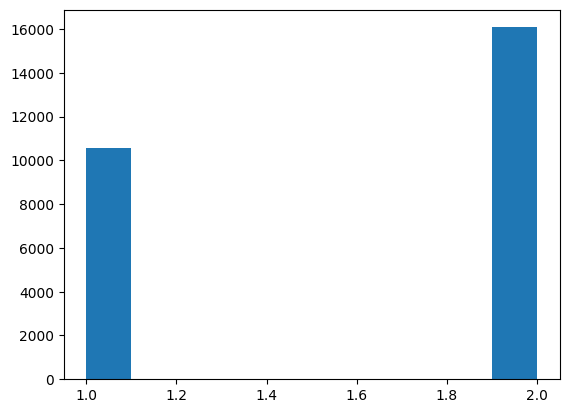

In [21]:
import matplotlib.pyplot as plt

# Generate the histogram and store the values
counts, bins, patches = plt.hist(df_clean_2['SEX'])

# Print the exact heights of bars (counts)
print("Counts (Heights of bars):", counts)

# Print the bin edges
print("Bins (Edges of bars):", bins)

# Show the histogram
plt.show()


In [22]:
df_clean_2['EDUCATION'].value_counts()


,count
EDUCATION,
2,12458
1,9412
3,4380
5,245
4,115
6,43
0,11


(array([1.1000e+01, 9.4120e+03, 0.0000e+00, 1.2458e+04, 0.0000e+00,
        4.3800e+03, 1.1500e+02, 0.0000e+00, 2.4500e+02, 4.3000e+01]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

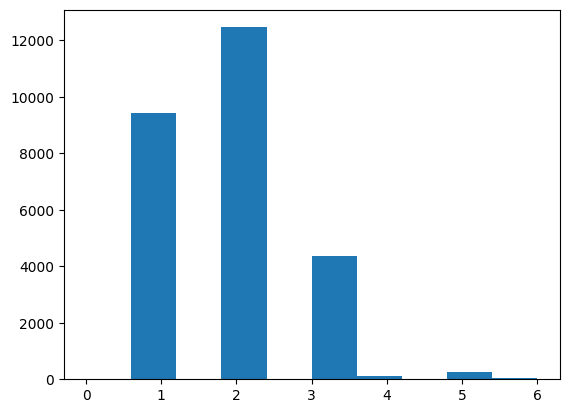

In [23]:
plt.hist(df_clean_2['EDUCATION'])

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64


(array([   48.,     0.,     0., 12172.,     0.,     0., 14158.,     0.,
            0.,   286.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

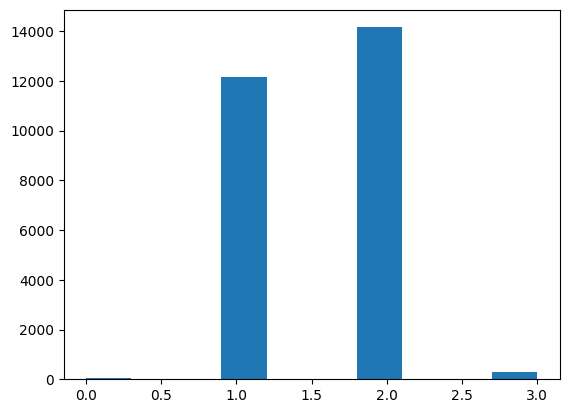

In [24]:
print(df_clean_2['MARRIAGE'].value_counts())
plt.hist(df_clean_2['MARRIAGE'])

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

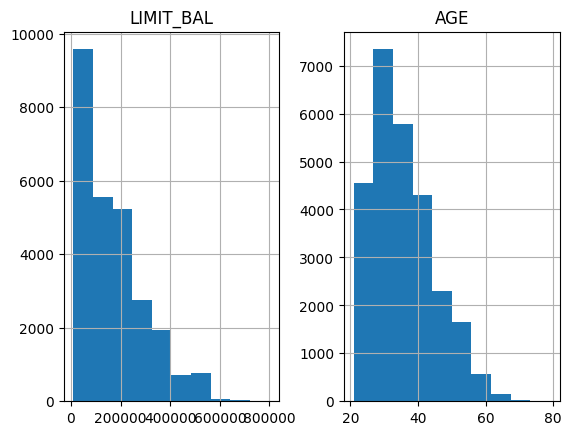

In [25]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [26]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [27]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6],\
                                value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

<ipython-input-27-796733c3f8c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6],\


,count
EDUCATION,
2,12458
1,9412
3,4380
4,414


In [28]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, \
                               inplace=True)
df_clean_2['MARRIAGE'].value_counts()

<ipython-input-28-f5f56ced7932>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, \


,count
MARRIAGE,
2,14158
1,12172
3,334


In [29]:
df_clean_2['EDUCATION'].value_counts()

,count
EDUCATION,
2,12458
1,9412
3,4380
4,414


In [30]:
df_clean_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Text(0.5, 0, 'Education level: ordinal encoding')

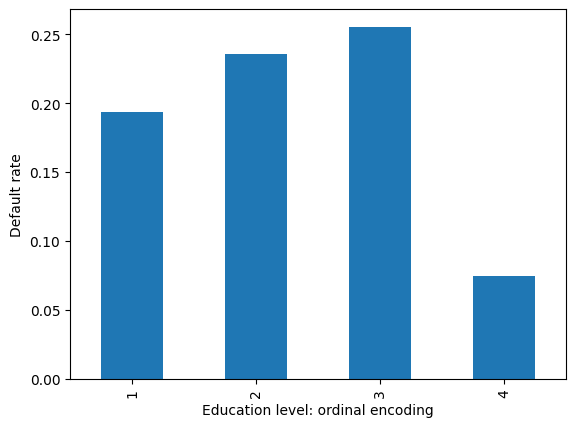

In [31]:
# ordinal  encoding not relly helpful in these case
import matplotlib.pyplot as plt
df_clean_2.groupby('EDUCATION').agg({'default payment next '\
 'month':'mean'})\
 .plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [32]:
# One Hot Encoding
df_clean_2['EDUCATION_CAT']='none'

In [33]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [34]:
cat_mapping = {1: "graduate school",\
 2: "university",\
 3: "high school",\
               4: "others"}

In [35]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION']\
 .map(cat_mapping)

In [36]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [37]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


In [38]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',\
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,False,False,True,False
1,university,False,False,True,False
2,university,False,False,True,False
3,university,False,False,True,False
4,university,False,False,True,False
5,graduate school,True,False,False,False
6,graduate school,True,False,False,False
7,university,False,False,True,False
8,high school,False,True,False,False
9,high school,False,True,False,False


In [39]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', \
             'PAY_6']


In [40]:
df_clean_2[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [41]:
df_clean_2[pay_feats[0]].value_counts().sort_index()

,count
PAY_1,
-2,2476
-1,5047
0,13087
1,3261
2,2378
3,292
4,63
5,23
6,11


(<Axes: >,)

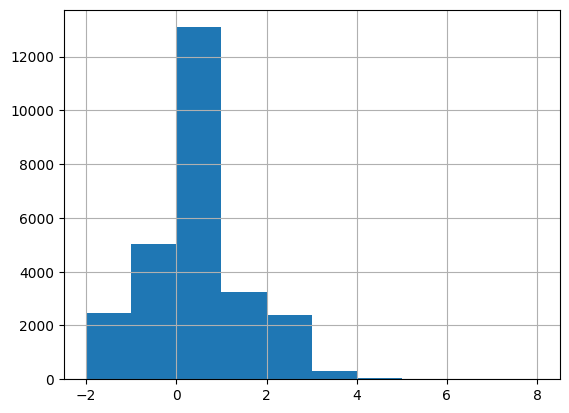

In [ ]:
df_clean_2[pay_feats[0]].hist()


In [ ]:
df_clean_2['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
-2,2476
2,2378
3,292
4,63
5,23
8,17


array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>],
       [<Axes: title={'center': 'PAY_3'}>,
        <Axes: title={'center': 'PAY_4'}>],
       [<Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

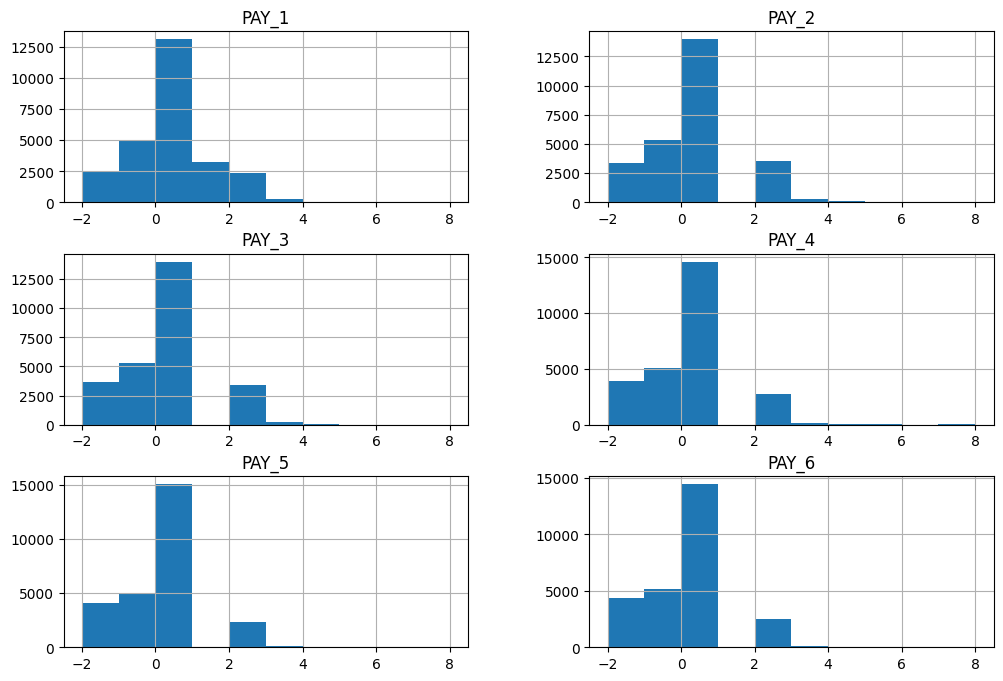

In [43]:
df_clean_2[pay_feats].hist(figsize=(12, 8))  # Adjust width and height as needed


In [44]:
df_clean_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT'],
      dtype='object')

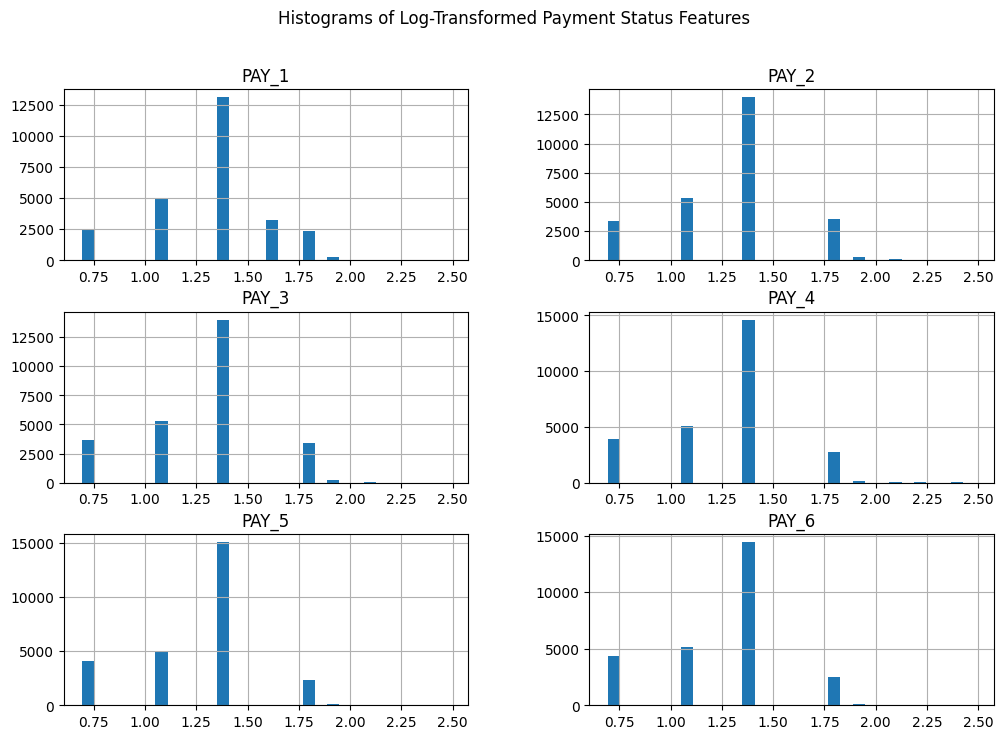

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation (log1p to handle zero and negative values safely)
df_log_transformed = df_clean_2[pay_feats].apply(lambda x: np.log1p(x - x.min() + 1))

# Plot histograms
df_log_transformed.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Log-Transformed Payment Status Features")
plt.show()


In [46]:
# Define feature lists
bill_amount_features = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
payment_amount_features = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]


In [48]:
df_clean_2[bill_amount_features].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>],
       [<Axes: title={'center': 'BILL_AMT3'}>,
        <Axes: title={'center': 'BILL_AMT4'}>],
       [<Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

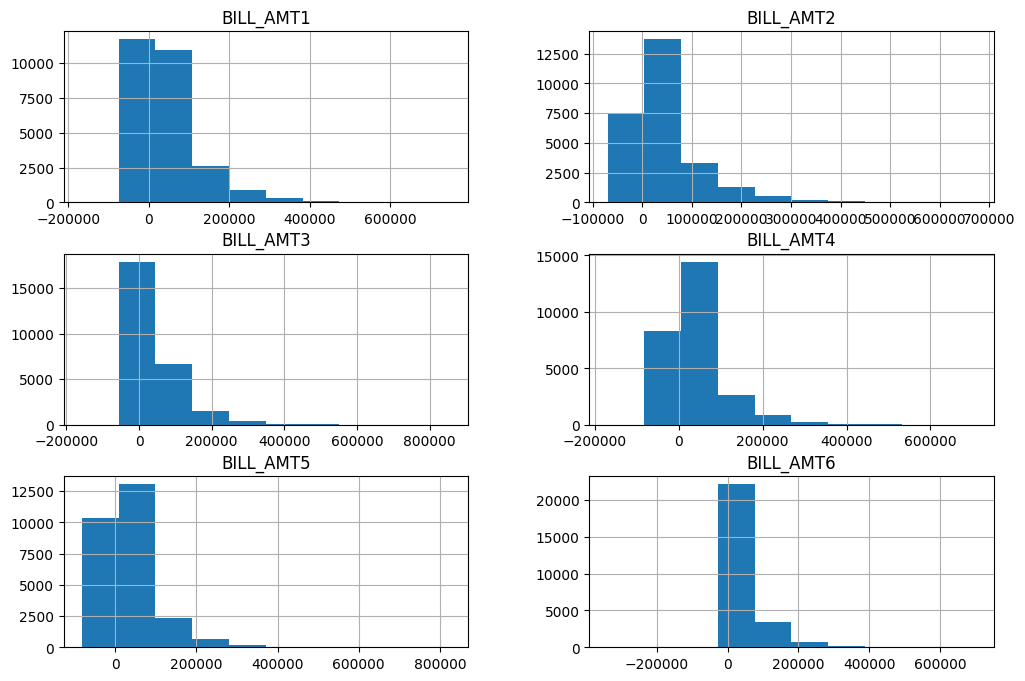

In [53]:
df_clean_2[bill_amount_features].hist(figsize=(12, 8))

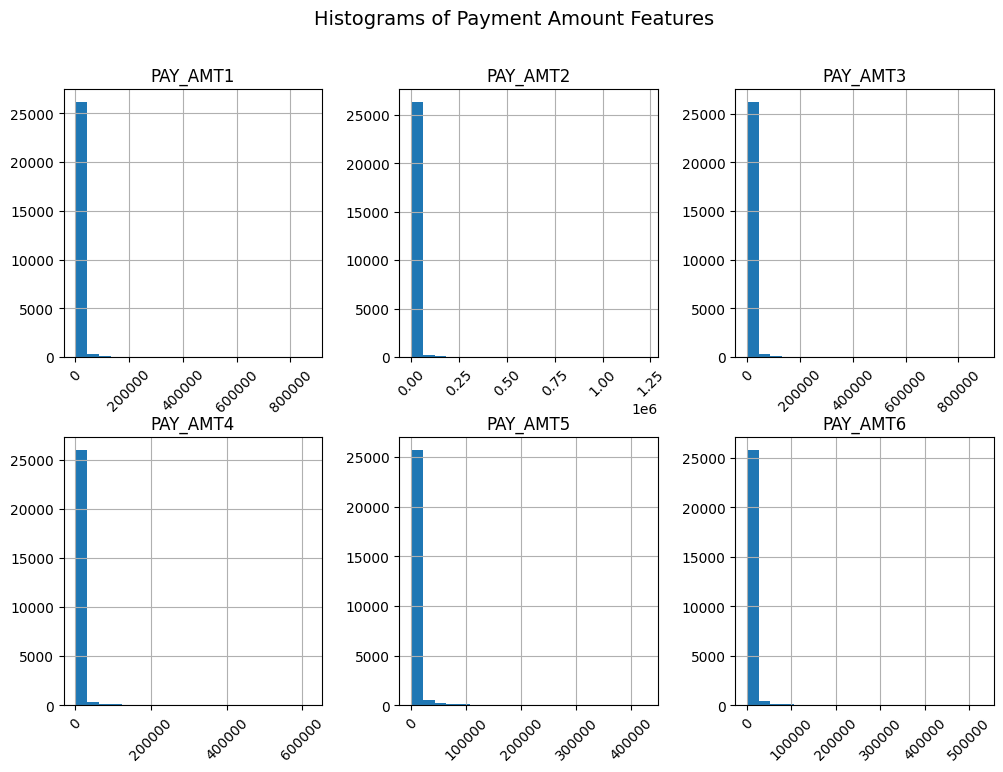

In [54]:
import matplotlib.pyplot as plt

# Define the payment amount features
payment_amount_features = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

# Plot histograms with rotated x-axis labels
df_clean_2[payment_amount_features].hist(figsize=(12, 8), bins=20, layout=(2, 3), xrot=45)

# Add a title
plt.suptitle("Histograms of Payment Amount Features", fontsize=14)

# Show the plot
plt.show()


In [57]:
# Define the payment amount columns
pay_amt_feats = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

# Boolean mask: Check where payment amount is exactly 0
zero_payments_mask = (df_clean_2[pay_amt_feats] == 0)

# Count how many times payment is 0 for each month
zero_counts = zero_payments_mask.sum()

# Display the results
print("Number of zero payments in each PAY_AMT column:")
print(zero_counts)

# Calculate the percentage of zero payments
zero_percentage = (zero_counts / len(df_clean_2)) * 100
print("\nPercentage of zero payments in each PAY_AMT column:")
print(zero_percentage)


Number of zero payments in each PAY_AMT column:
PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

Percentage of zero payments in each PAY_AMT column:
PAY_AMT1    17.461746
PAY_AMT2    18.125563
PAY_AMT3    19.850735
PAY_AMT4    21.365887
PAY_AMT5    22.430993
PAY_AMT6    23.901140
dtype: float64


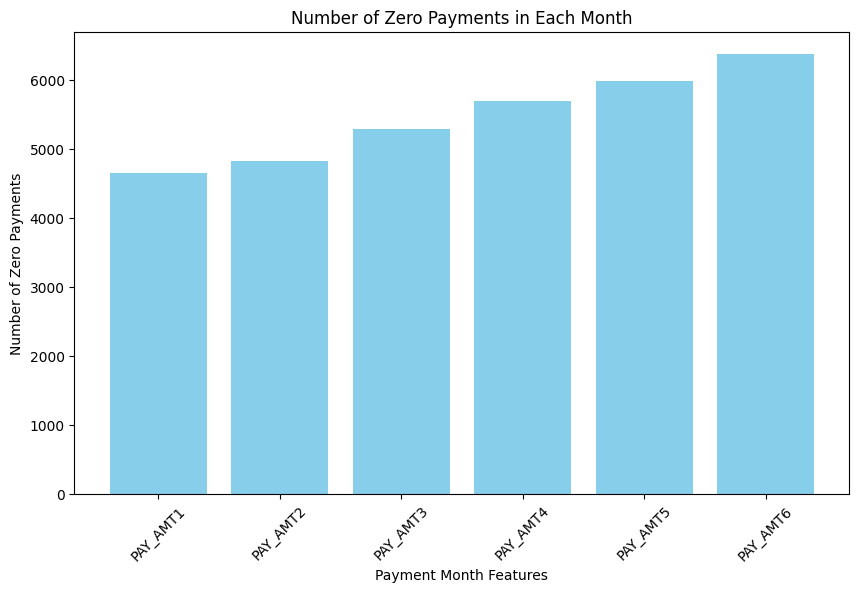

In [58]:
import matplotlib.pyplot as plt

# Plot a bar chart for zero payment counts
plt.figure(figsize=(10, 6))
plt.bar(zero_counts.index, zero_counts.values, color='skyblue')

# Add labels and title
plt.xlabel("Payment Month Features")
plt.ylabel("Number of Zero Payments")
plt.title("Number of Zero Payments in Each Month")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


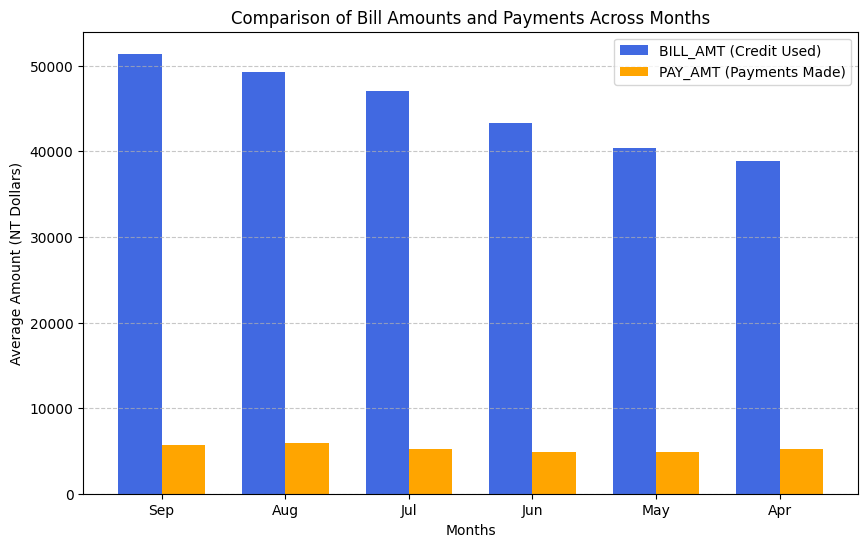

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bill amount and payment amount columns
bill_amt_feats = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
pay_amt_feats = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
months = ["Sep", "Aug", "Jul", "Jun", "May", "Apr"]  # Month names in order

# Calculate the mean values for each feature
bill_means = df_clean_2[bill_amt_feats].mean()
pay_means = df_clean_2[pay_amt_feats].mean()

# Set up bar positions
x = np.arange(len(months))  # Create index positions
width = 0.35  # Width of bars

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, bill_means, width, label="BILL_AMT (Credit Used)", color='royalblue')
plt.bar(x + width/2, pay_means, width, label="PAY_AMT (Payments Made)", color='orange')

# Labels and formatting
plt.xlabel("Months")
plt.ylabel("Average Amount (NT Dollars)")
plt.title("Comparison of Bill Amounts and Payments Across Months")
plt.xticks(ticks=x, labels=months)  # Set x-axis labels
plt.legend()  # Add legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Show the plot
plt.show()
